# Pre-Processing

In [432]:
#pre-processing
import numpy as np
import pandas as pd

#train-test division
from sklearn.model_selection import train_test_split

#model imputation
from sklearn.linear_model import LogisticRegression

#performance measure
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [433]:
data = pd.read_csv(r"credit_score.csv")


In [434]:
data.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


In [435]:
pd.set_option('display.max_columns', 30)
data.describe(include = 'all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,77583,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,NaN,NaN,NaN,6260,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,Not Specified,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,NaN,NaN,NaN,1208,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,NaN,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,NaN,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,NaN,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,NaN,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,NaN,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,NaN,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [436]:
data.dtypes

ID                         object
CustomerID                 object
Month                      object
Name                       object
Age                         int64
SSN                        object
Occupation                 object
AnnualIncome              float64
MonthlyInhandSalary       float64
NumBankAccounts             int64
NumCreditCard               int64
InterestRate                int64
NumofLoan                   int64
TypeofLoan                 object
Delayfromduedate            int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
OutstandingDebt           float64
CreditUtilizationRatio    float64
PaymentofMinAmount         object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
PaymentBehaviour           object
MonthlyBalance            float64
CreditScore                object
dtype: object

In [437]:
data.CreditScore.value_counts()

Standard    46651
Poor        25350
Good        15494
Name: CreditScore, dtype: int64

In [438]:
data['score'] = np.where(data['CreditScore'] != 'Poor', 0, 1)
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [439]:
data.score.value_counts()

0    62145
1    25350
Name: score, dtype: int64

In [440]:
data.columns

Index(['ID', 'CustomerID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'AnnualIncome', 'MonthlyInhandSalary', 'NumBankAccounts',
       'NumCreditCard', 'InterestRate', 'NumofLoan', 'TypeofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'CreditScore', 'score'],
      dtype='object')

In [441]:
data.drop('ID', axis = 1, inplace = True)
data.drop('CustomerID', axis = 1, inplace = True)
data.drop('Name', axis = 1, inplace = True)
data.drop('SSN', axis = 1, inplace = True)
data.drop('TypeofLoan', axis = 1, inplace = True)

In [345]:
data.columns

Index(['Month', 'Age', 'Occupation', 'AnnualIncome', 'MonthlyInhandSalary',
       'NumBankAccounts', 'NumCreditCard', 'InterestRate', 'NumofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'CreditScore', 'score'],
      dtype='object')

In [442]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

In [443]:
data['Occupation'].fillna(data['Occupation'].mode()[0], inplace = True)
for i in data[['MonthlyInhandSalary', 'NumofDelayedPayment', 'ChangedCreditLimit', 'NumCreditInquiries', 'Amountinvestedmonthly', 'MonthlyBalance']]:
  data[i].fillna(data[i].mean(), inplace = True)

In [444]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
score                     0
dtype: int64

In [445]:
corr = data.corr()['score']
corr

<ipython-input-445-cf547e98443d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()['score']


Age                      -0.004274
AnnualIncome             -0.009860
MonthlyInhandSalary      -0.150101
NumBankAccounts           0.008252
NumCreditCard             0.007890
InterestRate              0.005670
NumofLoan                 0.007689
Delayfromduedate          0.372259
NumofDelayedPayment       0.002691
ChangedCreditLimit        0.063423
NumCreditInquiries        0.009709
OutstandingDebt           0.363620
CreditUtilizationRatio   -0.036634
TotalEMIpermonth         -0.002168
Amountinvestedmonthly    -0.107100
MonthlyBalance           -0.168818
score                     1.000000
Name: score, dtype: float64

In [446]:
data.dtypes

Month                      object
Age                         int64
Occupation                 object
AnnualIncome              float64
MonthlyInhandSalary       float64
NumBankAccounts             int64
NumCreditCard               int64
InterestRate                int64
NumofLoan                   int64
Delayfromduedate            int64
NumofDelayedPayment       float64
ChangedCreditLimit        float64
NumCreditInquiries        float64
OutstandingDebt           float64
CreditUtilizationRatio    float64
PaymentofMinAmount         object
TotalEMIpermonth          float64
Amountinvestedmonthly     float64
PaymentBehaviour           object
MonthlyBalance            float64
CreditScore                object
score                       int64
dtype: object

In [447]:
#taking columns have higher corr than 0.01
data = data[['AnnualIncome', 'MonthlyInhandSalary', 'Delayfromduedate', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio', 'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month', 'PaymentofMinAmount', 'PaymentBehaviour', 'score'  ]]

In [352]:
data

,AnnualIncome,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,19114.12,1824.843333,3,11.270000,4.0,809.98,26.822620,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,19114.12,4193.181285,-1,11.270000,4.0,809.98,31.944960,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,19114.12,4193.181285,3,10.385851,4.0,809.98,28.609352,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,19114.12,4193.181285,5,6.270000,4.0,809.98,31.377862,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,19114.12,1824.843333,6,11.270000,4.0,809.98,24.797347,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,39628.99,3359.415833,20,9.500000,3.0,502.38,39.323569,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,39628.99,3359.415833,23,11.500000,3.0,502.38,34.663572,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,39628.99,3359.415833,18,11.500000,3.0,502.38,40.565631,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,39628.99,3359.415833,27,11.500000,3.0,502.38,41.255522,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


In [448]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['AnnualIncome', 'Delayfromduedate', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'Amountinvestedmonthly', 'MonthlyBalance']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif
#deleted monthlyinhandsalary and creditutilizationratio

,VIF,Features
0,1.016055,AnnualIncome
1,4.051801,Delayfromduedate
2,3.773950,ChangedCreditLimit
3,1.019936,NumCreditInquiries
4,4.344240,OutstandingDebt
5,1.750692,Amountinvestedmonthly
6,2.398084,MonthlyBalance


In [449]:
data = data[['AnnualIncome', 'Delayfromduedate', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month', 'PaymentofMinAmount', 'PaymentBehaviour', 'score' ]]

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt

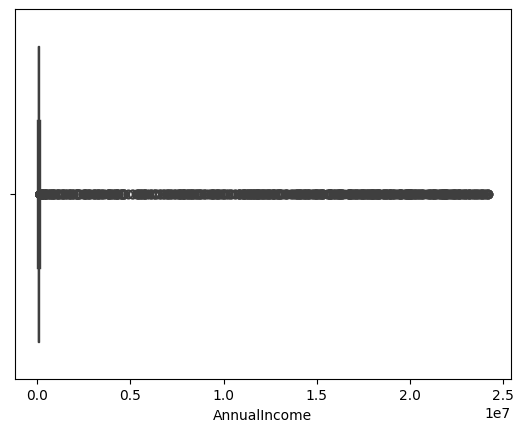

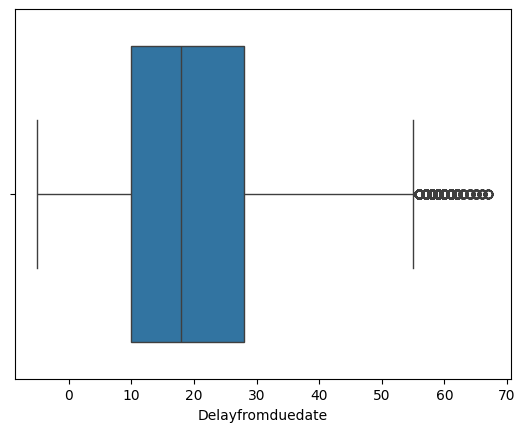

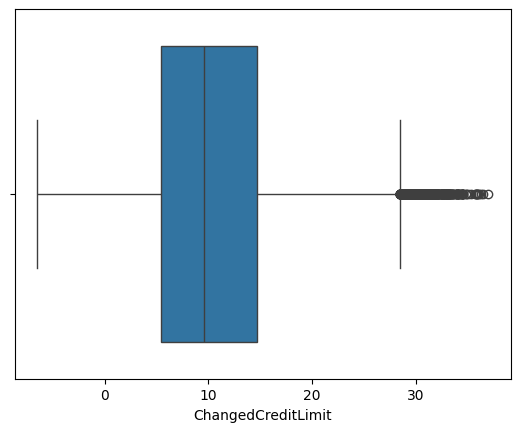

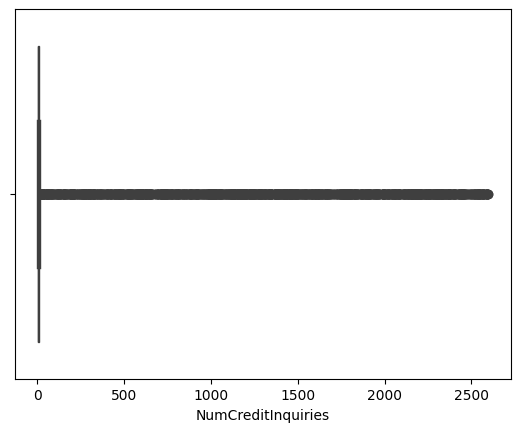

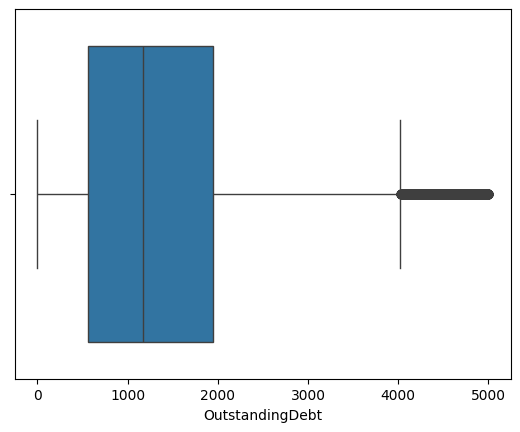

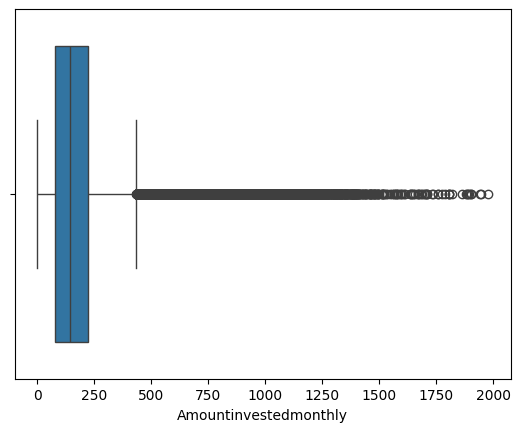

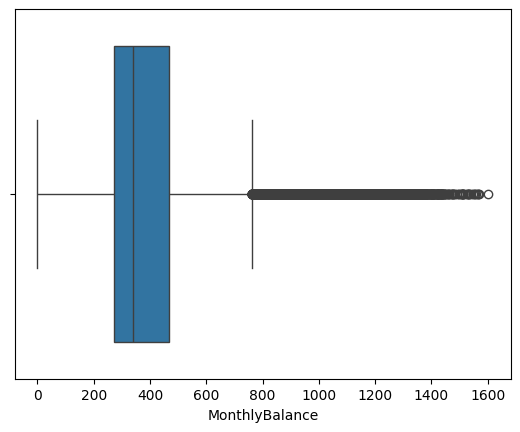

In [451]:
for i in data[['AnnualIncome', 'Delayfromduedate', 'ChangedCreditLimit', 'NumCreditInquiries', 'OutstandingDebt', 'Amountinvestedmonthly', 'MonthlyBalance']]:
  sns.boxplot(data = data, x = data[i])
  plt.show()

In [452]:
data.drop('NumCreditInquiries', axis = 1, inplace = True)
data.drop('AnnualIncome', axis = 1, inplace = True)


In [358]:
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,3,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,-1,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,3,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,5,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,6,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...
87490,20,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,23,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,18,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,27,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


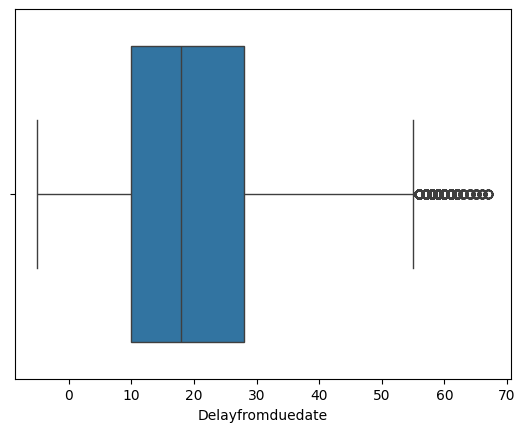

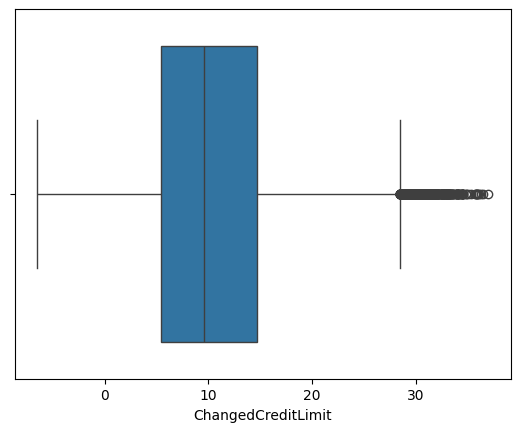

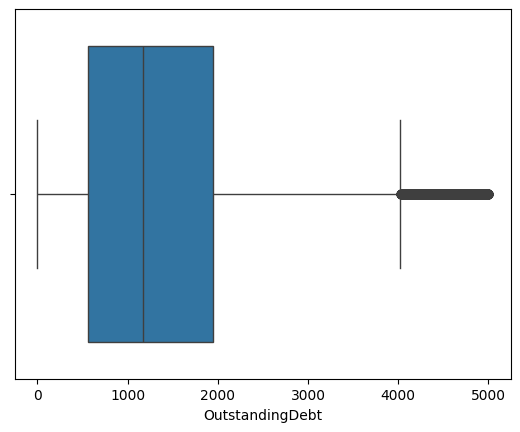

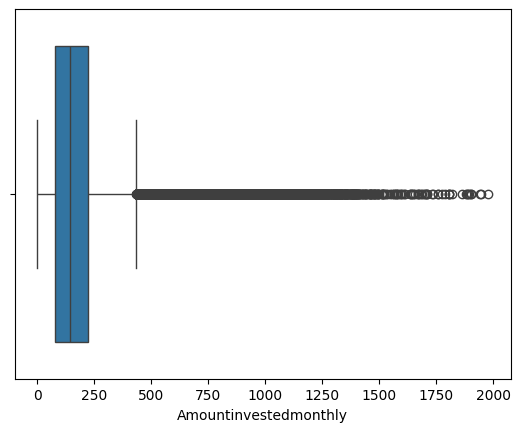

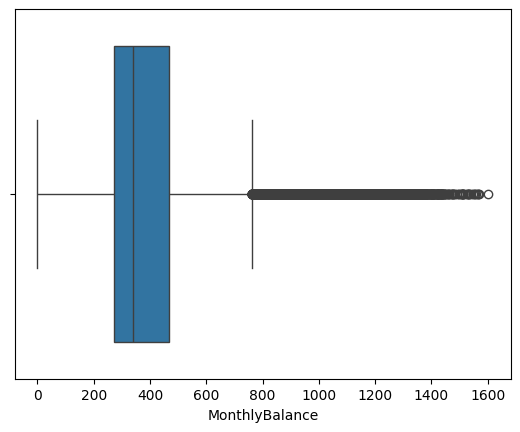

In [453]:
for i in data[['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt', 'Amountinvestedmonthly', 'MonthlyBalance']]:
  sns.boxplot(data = data, x = data[i])
  plt.show()

In [454]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

<ipython-input-454-d590f9f231df>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
<ipython-input-454-d590f9f231df>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


In [455]:
for i in data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])

In [456]:
data.columns

Index(['Delayfromduedate', 'ChangedCreditLimit', 'OutstandingDebt',
       'Amountinvestedmonthly', 'MonthlyBalance', 'Occupation', 'Month',
       'PaymentofMinAmount', 'PaymentBehaviour', 'score'],
      dtype='object')

In [457]:
ranges = [-np.inf, data['Delayfromduedate'].quantile(0.25), data['Delayfromduedate'].quantile(0.5), data['Delayfromduedate'].quantile(0.75), np.inf]
data['Delayfromduedate_category'] = pd.cut(data['Delayfromduedate'], bins = ranges)
grouped = data.groupby(['Delayfromduedate_category', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'Delayfromduedate_woe'}, inplace=True)
data = data.merge(grouped[['Delayfromduedate_category','Delayfromduedate_woe']], how='left', on='Delayfromduedate_category')

#----------------------------------------------------------------------------

ranges = [-np.inf, data['ChangedCreditLimit'].quantile(0.25), data['ChangedCreditLimit'].quantile(0.5), data['ChangedCreditLimit'].quantile(0.75), np.inf]  # np.inf for infinity
data['ChangedCreditLimit_category'] = pd.cut(data['ChangedCreditLimit'], bins=ranges)
grouped = data.groupby(['ChangedCreditLimit_category', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'ChangedCreditLimit_woe'}, inplace=True)
data = data.merge(grouped[['ChangedCreditLimit_category','ChangedCreditLimit_woe']], how='left', on='ChangedCreditLimit_category')

#----------------------------------------------------------------------------

ranges = [-np.inf, data['OutstandingDebt'].quantile(0.25), data['OutstandingDebt'].quantile(0.5), data['OutstandingDebt'].quantile(0.75), np.inf]  # np.inf for infinity
data['OutstandingDebt_category'] = pd.cut(data['OutstandingDebt'], bins=ranges)
grouped = data.groupby(['OutstandingDebt_category', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'OutstandingDebt_woe'}, inplace=True)
data = data.merge(grouped[['OutstandingDebt_category','OutstandingDebt_woe']], how='left', on='OutstandingDebt_category')

#----------------------------------------------------------------------------

ranges = [-np.inf, data['Amountinvestedmonthly'].quantile(0.25), data['Amountinvestedmonthly'].quantile(0.5), data['Amountinvestedmonthly'].quantile(0.75), np.inf]  # np.inf for infinity
data['Amountinvestedmonthly_category'] = pd.cut(data['Amountinvestedmonthly'], bins=ranges)
grouped = data.groupby(['Amountinvestedmonthly_category', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'Amountinvestedmonthly_woe'}, inplace=True)
data = data.merge(grouped[['Amountinvestedmonthly_category','Amountinvestedmonthly_woe']], how='left', on='Amountinvestedmonthly_category')

#----------------------------------------------------------------------------

ranges = [-np.inf, data['MonthlyBalance'].quantile(0.25), data['MonthlyBalance'].quantile(0.5), data['MonthlyBalance'].quantile(0.75), np.inf]  # np.inf for infinity
data['MonthlyBalance_category'] = pd.cut(data['MonthlyBalance'], bins=ranges)
grouped = data.groupby(['MonthlyBalance_category', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'MonthlyBalance_woe'}, inplace=True)
data = data.merge(grouped[['MonthlyBalance_category','MonthlyBalance_woe']], how='left', on='MonthlyBalance_category')


data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_category,Delayfromduedate_woe,ChangedCreditLimit_category,ChangedCreditLimit_woe,OutstandingDebt_category,OutstandingDebt_woe,Amountinvestedmonthly_category,Amountinvestedmonthly_woe,MonthlyBalance_category,MonthlyBalance_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,"(-inf, 10.0]",1.050763,"(5.425, 9.56]",0.039621,"(566.4, 1166.23]",1.209568,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(-inf, 76.962]",-0.200594,"(338.591, 467.662]",0.214456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,"(18.0, 28.0]",-0.100916,"(5.425, 9.56]",0.039621,"(-inf, 566.4]",1.271917,"(76.962, 143.313]",-0.124014,"(338.591, 467.662]",0.214456
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,"(18.0, 28.0]",-0.100916,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,"(10.0, 18.0]",0.496847,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,"(18.0, 28.0]",-0.100916,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625


In [458]:
grouped = data.groupby(['Occupation', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'Occupation_woe'}, inplace=True)
data = data.merge(grouped[['Occupation','Occupation_woe']], how='left', on='Occupation')

#-------------------------------------------------------------------

grouped = data.groupby(['Month', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'Month_woe'}, inplace=True)
data = data.merge(grouped[['Month','Month_woe']], how='left', on='Month')

#-------------------------------------------------------------------

grouped = data.groupby(['PaymentofMinAmount', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'PaymentofMinAmount_woe'}, inplace=True)
data = data.merge(grouped[['PaymentofMinAmount','PaymentofMinAmount_woe']], how='left', on='PaymentofMinAmount')

#-------------------------------------------------------------------

grouped = data.groupby(['PaymentBehaviour', 'score'])['score'].count().unstack().reset_index()
grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
grouped.rename(columns={'woe':'PaymentBehaviour_woe'}, inplace=True)
data = data.merge(grouped[['PaymentBehaviour','PaymentBehaviour_woe']], how='left', on='PaymentBehaviour')
#data.drop('PaymentBehaviour', axis=1, inplace=True)

data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_category,Delayfromduedate_woe,ChangedCreditLimit_category,ChangedCreditLimit_woe,OutstandingDebt_category,OutstandingDebt_woe,Amountinvestedmonthly_category,Amountinvestedmonthly_woe,MonthlyBalance_category,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,-0.080783,0.013036,0.97376,0.087011
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,-0.080783,0.031453,0.97376,0.057730
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,-0.080783,0.021323,0.97376,-0.070569
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,"(-inf, 10.0]",1.050763,"(5.425, 9.56]",0.039621,"(566.4, 1166.23]",1.209568,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969,-0.080783,-0.017560,0.97376,-0.315796
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(-inf, 76.962]",-0.200594,"(338.591, 467.662]",0.214456,-0.080783,-0.019930,0.97376,0.182672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,"(18.0, 28.0]",-0.100916,"(5.425, 9.56]",0.039621,"(-inf, 566.4]",1.271917,"(76.962, 143.313]",-0.124014,"(338.591, 467.662]",0.214456,-0.053353,0.021323,0.97376,0.182672
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,"(18.0, 28.0]",-0.100916,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.053353,-0.017560,0.97376,0.391003
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,"(10.0, 18.0]",0.496847,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.053353,-0.019930,0.97376,0.182672
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,"(18.0, 28.0]",-0.100916,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.053353,-0.030392,0.97376,0.391003


In [459]:
inputs = data[['Delayfromduedate_woe', 'ChangedCreditLimit_woe', 'OutstandingDebt_woe', 'Amountinvestedmonthly_woe', 'MonthlyBalance_woe', 'Occupation_woe', 'Month_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe']]
output = data['score']

# Modeling

In [460]:
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size=0.3, random_state=42)

In [461]:
# Confusion matrix, classification report and gini 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
  y_pred = model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)[:, 1]

  roc_prob = roc_auc_score(y_test, y_pred_prob)
  gini_prob = roc_prob*2-1

  confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
  report = classification_report(y_test, y_pred)

  print("MODEL PERFORMANCE")
  print("GINI PROBABILITY IS", gini_prob*100)
  print(report)
  print(confusion_matrix)

In [462]:
dlg = LogisticRegression()
dlg.fit(X_train, y_train)

LogisticRegression()

In [463]:
result = evaluate(dlg, X_test, y_test)

MODEL PERFORMANCE
GINI PROBABILITY IS 57.89499993493317
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     18596
           1       0.62      0.52      0.56      7653

    accuracy                           0.77     26249
   macro avg       0.72      0.69      0.70     26249
weighted avg       0.76      0.77      0.76     26249

[[16174  2422]
 [ 3704  3949]]


In [464]:
# Logistic regression modeli qurulur

In [319]:
# Funksiya vasitesile oyrenmish modelin neticelerine baxin ( Gini, confusion matrix ve clf report)

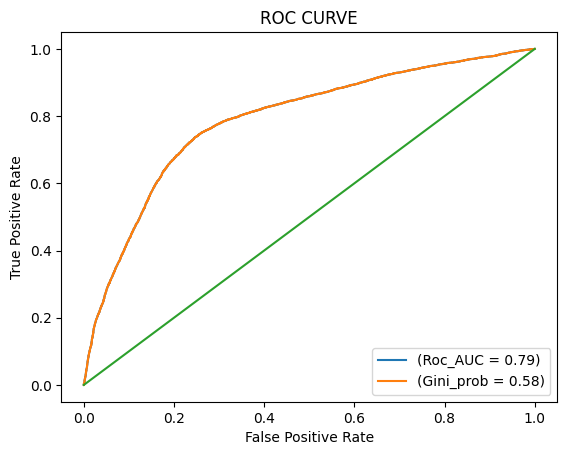

In [465]:
# Alinmish gini score uchun roc curve qrafiki yaradin.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = dlg.predict_proba(X_test)[:, 1]
roc_prob = roc_auc_score(y_test, y_pred_prob)
gini_prob = roc_prob*2-1

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()

plt.plot(fpr, tpr, label = '(Roc_AUC = %0.2f)' % roc_prob)
plt.plot(fpr, tpr, label = '(Gini_prob = %0.2f)' % gini_prob)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')

plt.legend(loc = 'lower right')
plt.show()



# Univariate analysis of Gini

In [406]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

variables = []
train_gini_scores = []
test_gini_scores = []

for i in X_train.columns:
  X_train_single_var = X_train[[i]]
  X_test_single_var = X_test[[i]]

  dlg.fit(X_train_single_var, y_train)
  y_pred_train_single_var = dlg.predict_proba(X_train_single_var)[:, 1]

  train_roc = roc_auc_score(y_train, y_pred_train_single_var)
  train_gini = train_roc*2-1

  y_pred_test_single_var = dlg.predict_proba(X_test_single_var)[:, 1]

  test_roc = roc_auc_score(y_test, y_pred_test_single_var)
  test_gini = test_roc*2-1

  variables.append(i)
  train_gini_scores.append(train_gini)
  test_gini_scores.append(test_gini)

results_df = pd.DataFrame({
    'Variable': variables,
    'Train Gini' : train_gini_scores,
    'Test Gini' : test_gini_scores
    })



In [407]:
results_df

,Variable,Train Gini,Test Gini
0,Delayfromduedate_woe,0.422944,0.402982
1,ChangedCreditLimit_woe,0.080815,0.066045
2,OutstandingDebt_woe,0.515335,0.511732
3,Amountinvestedmonthly_woe,0.109685,0.104577
4,MonthlyBalance_woe,0.237212,0.236151
5,Occupation_woe,0.031649,0.043458
6,Month_woe,0.011184,0.012202
7,PaymentofMinAmount_woe,0.304059,0.297636
8,PaymentBehaviour_woe,0.130513,0.125858


# Deployment

In [466]:
import pandas as pd
test_data = pd.read_excel(r'test_data_LR (1).xlsx')
test_data

,CustomerID,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour
0,CUS0xf55,39,6.37,1527.77,159.687185,538.820919,Entrepreneur,July,Yes,HighspentLargevaluepayments
1,CUS0x24af,6,19.64,281.84,117.147839,590.954834,Mechanic,January,Yes,HighspentMediumvaluepayments
2,CUS0x24af,6,19.64,281.84,51.505834,646.596839,Mechanic,April,Yes,HighspentLargevaluepayments
3,CUS0x24af,6,19.64,281.84,236.795961,501.306712,Mechanic,May,Yes,other
4,CUS0x24af,6,19.64,281.84,64.922693,633.179981,Mechanic,June,Yes,HighspentLargevaluepayments
...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,25,14.76,1375.13,212.556408,678.928544,Lawyer,January,Yes,LowspentLargevaluepayments
1320,CUS0x777b,29,14.76,1375.13,466.000000,367.208375,Lawyer,February,Yes,LowspentSmallvaluepayments
1321,CUS0x777b,29,14.76,1375.13,103.934014,757.550938,Lawyer,March,Yes,HighspentLargevaluepayments
1322,CUS0x777b,29,14.76,1375.13,256.175385,615.309567,Lawyer,April,Yes,other


In [409]:
data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_category,Delayfromduedate_woe,ChangedCreditLimit_category,ChangedCreditLimit_woe,OutstandingDebt_category,OutstandingDebt_woe,Amountinvestedmonthly_category,Amountinvestedmonthly_woe,MonthlyBalance_category,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,-0.080783,0.013036,0.97376,0.087011
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,-0.080783,0.031453,0.97376,0.057730
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(76.962, 143.313]",-0.124014,"(270.918, 338.591]",-0.237030,-0.080783,0.021323,0.97376,-0.070569
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,"(-inf, 10.0]",1.050763,"(5.425, 9.56]",0.039621,"(566.4, 1166.23]",1.209568,"(143.313, 219.931]",0.015442,"(-inf, 270.918]",-0.489969,-0.080783,-0.017560,0.97376,-0.315796
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,"(-inf, 10.0]",1.050763,"(9.56, 14.64]",0.131787,"(566.4, 1166.23]",1.209568,"(-inf, 76.962]",-0.200594,"(338.591, 467.662]",0.214456,-0.080783,-0.019930,0.97376,0.182672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,"(18.0, 28.0]",-0.100916,"(5.425, 9.56]",0.039621,"(-inf, 566.4]",1.271917,"(76.962, 143.313]",-0.124014,"(338.591, 467.662]",0.214456,-0.053353,0.021323,0.97376,0.182672
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,"(18.0, 28.0]",-0.100916,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.053353,-0.017560,0.97376,0.391003
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,"(10.0, 18.0]",0.496847,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.053353,-0.019930,0.97376,0.182672
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,"(18.0, 28.0]",-0.100916,"(9.56, 14.64]",0.131787,"(-inf, 566.4]",1.271917,"(-inf, 76.962]",-0.200594,"(467.662, inf]",0.683625,-0.053353,-0.030392,0.97376,0.391003


In [467]:
ranges = [-np.inf, data['Delayfromduedate'].quantile(0.25), data['Delayfromduedate'].quantile(0.5), data['Delayfromduedate'].quantile(0.75), np.inf]
test_data['Delayfromduedate_category'] = pd.cut(test_data['Delayfromduedate'], bins = ranges)

ranges = [-np.inf, data['ChangedCreditLimit'].quantile(0.25), data['ChangedCreditLimit'].quantile(0.5), data['ChangedCreditLimit'].quantile(0.75), np.inf]
test_data['ChangedCreditLimit_category'] = pd.cut(test_data['ChangedCreditLimit'], bins = ranges)

ranges = [-np.inf, data['OutstandingDebt'].quantile(0.25), data['OutstandingDebt'].quantile(0.5), data['OutstandingDebt'].quantile(0.75), np.inf]
test_data['OutstandingDebt_category'] = pd.cut(test_data['OutstandingDebt'], bins = ranges)

ranges = [-np.inf, data['Amountinvestedmonthly'].quantile(0.25), data['Amountinvestedmonthly'].quantile(0.5), data['Amountinvestedmonthly'].quantile(0.75), np.inf]
test_data['Amountinvestedmonthly_category'] = pd.cut(test_data['Amountinvestedmonthly'], bins = ranges)

ranges = [-np.inf, data['MonthlyBalance'].quantile(0.25), data['MonthlyBalance'].quantile(0.5), data['MonthlyBalance'].quantile(0.75), np.inf]
test_data['MonthlyBalance_category'] = pd.cut(test_data['MonthlyBalance'], bins = ranges)

test_data

,CustomerID,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,Delayfromduedate_category,ChangedCreditLimit_category,OutstandingDebt_category,Amountinvestedmonthly_category,MonthlyBalance_category
0,CUS0xf55,39,6.37,1527.77,159.687185,538.820919,Entrepreneur,July,Yes,HighspentLargevaluepayments,"(28.0, inf]","(5.425, 9.56]","(1166.23, 1948.98]","(143.313, 219.931]","(467.662, inf]"
1,CUS0x24af,6,19.64,281.84,117.147839,590.954834,Mechanic,January,Yes,HighspentMediumvaluepayments,"(-inf, 10.0]","(14.64, inf]","(-inf, 566.4]","(76.962, 143.313]","(467.662, inf]"
2,CUS0x24af,6,19.64,281.84,51.505834,646.596839,Mechanic,April,Yes,HighspentLargevaluepayments,"(-inf, 10.0]","(14.64, inf]","(-inf, 566.4]","(-inf, 76.962]","(467.662, inf]"
3,CUS0x24af,6,19.64,281.84,236.795961,501.306712,Mechanic,May,Yes,other,"(-inf, 10.0]","(14.64, inf]","(-inf, 566.4]","(219.931, inf]","(467.662, inf]"
4,CUS0x24af,6,19.64,281.84,64.922693,633.179981,Mechanic,June,Yes,HighspentLargevaluepayments,"(-inf, 10.0]","(14.64, inf]","(-inf, 566.4]","(-inf, 76.962]","(467.662, inf]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,25,14.76,1375.13,212.556408,678.928544,Lawyer,January,Yes,LowspentLargevaluepayments,"(18.0, 28.0]","(14.64, inf]","(1166.23, 1948.98]","(143.313, 219.931]","(467.662, inf]"
1320,CUS0x777b,29,14.76,1375.13,466.000000,367.208375,Lawyer,February,Yes,LowspentSmallvaluepayments,"(28.0, inf]","(14.64, inf]","(1166.23, 1948.98]","(219.931, inf]","(338.591, 467.662]"
1321,CUS0x777b,29,14.76,1375.13,103.934014,757.550938,Lawyer,March,Yes,HighspentLargevaluepayments,"(28.0, inf]","(14.64, inf]","(1166.23, 1948.98]","(76.962, 143.313]","(467.662, inf]"
1322,CUS0x777b,29,14.76,1375.13,256.175385,615.309567,Lawyer,April,Yes,other,"(28.0, inf]","(14.64, inf]","(1166.23, 1948.98]","(219.931, inf]","(467.662, inf]"


In [468]:
test_data = test_data.merge(data[['Delayfromduedate_category', 'Delayfromduedate_woe']].drop_duplicates(subset = 'Delayfromduedate_category'), how = 'left', on='Delayfromduedate_category')
test_data = test_data.merge(data[['ChangedCreditLimit_category', 'ChangedCreditLimit_woe']].drop_duplicates(subset = 'ChangedCreditLimit_category'), how = 'left', on='ChangedCreditLimit_category')
test_data = test_data.merge(data[['OutstandingDebt_category', 'OutstandingDebt_woe']].drop_duplicates(subset = 'OutstandingDebt_category'), how = 'left', on='OutstandingDebt_category')
test_data = test_data.merge(data[['Amountinvestedmonthly_category', 'Amountinvestedmonthly_woe']].drop_duplicates(subset = 'Amountinvestedmonthly_category'), how = 'left', on='Amountinvestedmonthly_category')
test_data = test_data.merge(data[['MonthlyBalance_category', 'MonthlyBalance_woe']].drop_duplicates(subset = 'MonthlyBalance_category'), how = 'left', on='MonthlyBalance_category')
test_data = test_data.merge(data[['Occupation', 'Occupation_woe']].drop_duplicates(subset = 'Occupation'), how = 'left', on = 'Occupation')
test_data = test_data.merge(data[['Month', 'Month_woe']].drop_duplicates(subset = 'Month'), how = 'left', on = 'Month')
test_data = test_data.merge(data[['PaymentofMinAmount', 'PaymentofMinAmount_woe']].drop_duplicates(subset = 'PaymentofMinAmount'), how = 'left', on = 'PaymentofMinAmount')
test_data = test_data.merge(data[['PaymentBehaviour', 'PaymentBehaviour_woe']].drop_duplicates(subset = 'PaymentBehaviour'), how = 'left', on = 'PaymentBehaviour')


In [377]:
test_data

,CustomerID,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour
0,CUS0xf55,39,6.37,1527.77,159.687185,538.820919,Entrepreneur,July,Yes,HighspentLargevaluepayments
1,CUS0x24af,6,19.64,281.84,117.147839,590.954834,Mechanic,January,Yes,HighspentMediumvaluepayments
2,CUS0x24af,6,19.64,281.84,51.505834,646.596839,Mechanic,April,Yes,HighspentLargevaluepayments
3,CUS0x24af,6,19.64,281.84,236.795961,501.306712,Mechanic,May,Yes,other
4,CUS0x24af,6,19.64,281.84,64.922693,633.179981,Mechanic,June,Yes,HighspentLargevaluepayments
...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,25,14.76,1375.13,212.556408,678.928544,Lawyer,January,Yes,LowspentLargevaluepayments
1320,CUS0x777b,29,14.76,1375.13,466.000000,367.208375,Lawyer,February,Yes,LowspentSmallvaluepayments
1321,CUS0x777b,29,14.76,1375.13,103.934014,757.550938,Lawyer,March,Yes,HighspentLargevaluepayments
1322,CUS0x777b,29,14.76,1375.13,256.175385,615.309567,Lawyer,April,Yes,other


In [469]:
test_data.isnull().sum()

CustomerID                        0
Delayfromduedate                  0
ChangedCreditLimit                0
OutstandingDebt                   0
Amountinvestedmonthly             0
MonthlyBalance                    0
Occupation                        0
Month                             0
PaymentofMinAmount                0
PaymentBehaviour                  0
Delayfromduedate_category         0
ChangedCreditLimit_category       0
OutstandingDebt_category          0
Amountinvestedmonthly_category    0
MonthlyBalance_category           0
Delayfromduedate_woe              0
ChangedCreditLimit_woe            0
OutstandingDebt_woe               0
Amountinvestedmonthly_woe         0
MonthlyBalance_woe                0
Occupation_woe                    0
Month_woe                         0
PaymentofMinAmount_woe            0
PaymentBehaviour_woe              0
dtype: int64

In [470]:
test_data_woe = test_data[['CustomerID','Delayfromduedate_woe','ChangedCreditLimit_woe', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_woe', 'MonthlyBalance_woe', 'Occupation_woe',
       'Month_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe']]

test_data_woe

,CustomerID,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,CUS0xf55,-1.094846,0.039621,-0.352109,0.015442,0.683625,-0.090130,-0.001817,-0.472545,0.391003
1,CUS0x24af,1.050763,-0.248829,1.271917,-0.124014,0.683625,-0.053353,0.013036,-0.472545,0.182672
2,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.017560,-0.472545,0.391003
3,CUS0x24af,1.050763,-0.248829,1.271917,0.347071,0.683625,-0.053353,-0.019930,-0.472545,-0.003414
4,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.030392,-0.472545,0.391003
...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,-0.100916,-0.248829,-0.352109,0.015442,0.683625,0.034597,0.013036,-0.472545,0.057730
1320,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.214456,0.034597,0.031453,-0.472545,-0.315796
1321,CUS0x777b,-1.094846,-0.248829,-0.352109,-0.124014,0.683625,0.034597,0.021323,-0.472545,0.391003
1322,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.683625,0.034597,-0.017560,-0.472545,-0.003414


In [422]:
test_data_woe

,CustomerID,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,CUS0xf55,-1.094846,0.039621,-0.352109,0.015442,0.683625,-0.090130,-0.001817,-0.472545,0.391003
1,CUS0x24af,1.050763,-0.248829,1.271917,-0.124014,0.683625,-0.053353,0.013036,-0.472545,0.182672
2,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.017560,-0.472545,0.391003
3,CUS0x24af,1.050763,-0.248829,1.271917,0.347071,0.683625,-0.053353,-0.019930,-0.472545,-0.003414
4,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.030392,-0.472545,0.391003
...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,-0.100916,-0.248829,-0.352109,0.015442,0.683625,0.034597,0.013036,-0.472545,0.057730
1320,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.214456,0.034597,0.031453,-0.472545,-0.315796
1321,CUS0x777b,-1.094846,-0.248829,-0.352109,-0.124014,0.683625,0.034597,0.021323,-0.472545,0.391003
1322,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.683625,0.034597,-0.017560,-0.472545,-0.003414


In [471]:
#prediction

prob = dlg.predict_proba(test_data_woe.iloc[:,1:])[:,1]


Number of features in training data: 1
Number of features in test data: 10


In [472]:
test_data_woe['PD'] = prob
test_data_woe



<ipython-input-472-56319bcac172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_woe['PD'] = prob


,CustomerID,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe,PD
0,CUS0xf55,-1.094846,0.039621,-0.352109,0.015442,0.683625,-0.090130,-0.001817,-0.472545,0.391003,0.483430
1,CUS0x24af,1.050763,-0.248829,1.271917,-0.124014,0.683625,-0.053353,0.013036,-0.472545,0.182672,0.049684
2,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.017560,-0.472545,0.391003,0.045135
3,CUS0x24af,1.050763,-0.248829,1.271917,0.347071,0.683625,-0.053353,-0.019930,-0.472545,-0.003414,0.050204
4,CUS0x24af,1.050763,-0.248829,1.271917,-0.200594,0.683625,-0.053353,-0.030392,-0.472545,0.391003,0.045735
...,...,...,...,...,...,...,...,...,...,...,...
1319,CUS0x777b,-0.100916,-0.248829,-0.352109,0.015442,0.683625,0.034597,0.013036,-0.472545,0.057730,0.264280
1320,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.214456,0.034597,0.031453,-0.472545,-0.315796,0.405829
1321,CUS0x777b,-1.094846,-0.248829,-0.352109,-0.124014,0.683625,0.034597,0.021323,-0.472545,0.391003,0.324182
1322,CUS0x777b,-1.094846,-0.248829,-0.352109,0.347071,0.683625,0.034597,-0.017560,-0.472545,-0.003414,0.364458
